In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 8
fig_height = 6
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcc2doeXNcTXkgRHJpdmUgKHNnaHlzZWxpQHN0dWRlbnQudWJjLmNhKVxxdWFydG9cZ2l0aHViaW9cY29udGVudFxlb3NjNTU1XGxlY3R1cmVzXGxlY3R1cmU2'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

C:\Users\sghys\AppData\Local\Temp\ipykernel_10948\1549427364.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap_external.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\zipimport.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\codecs.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\aliases.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\__init__.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\utf_8.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\cp1252.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\io.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\stat.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\_collections_abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\

In [2]:
#| label: jvp
#| fig-cap: The Jacobian vector product using automatic differentiation.
import torch
from torch.autograd.functional import jvp
from torch.autograd.functional import jacobian

# Define a simple forward function
def F(p):
    return torch.stack([p[0]**2 + p[1], p[1]**3 + p[0]])

# Input point p_k
p_k = torch.tensor([1.0, 1.0])

# Arbitrary vector v, same size as p_k
v = torch.tensor([1.0,1.0], requires_grad=True)

# Compute the Jacobian-vector product (J(p) * v)
F_output, jvp_result = jvp(F, (p_k,), v, create_graph=True)
print("Function output:")
print(F_output)
print("Jacobian-vector product:")
print(jvp_result)

# Initialize a list to store each row of the Jacobian
jacobian_rows = []
# Compute the gradient of each component of the JVP result separately, retaining the graph to avoid re-computation
for i in range(F_output.shape[0]):
    v.grad = None  # Clear the gradient
    jvp_result.backward(torch.tensor([1.0 if i == j else 0.0 for j in range(F_output.shape[0])]), retain_graph=True)
    jacobian_rows.append(v.grad.clone())  # Append the gradient (row of the Jacobian)

# Stack the rows to get the full Jacobian matrix
jacobian_matrix = torch.stack(jacobian_rows, dim=0)

# Print the Jacobian matrix
print("Jacobian matrix at p_k:")
print(jacobian_matrix)

# Compute the full Jacobian matrix directly
jacobian_matrix = jacobian(F, p_k)

# Print the Jacobian matrix
print("Jacobian matrix at p_k:")
print(jacobian_matrix)

Function output:
tensor([2., 2.], grad_fn=<StackBackward0>)
Jacobian-vector product:
tensor([3., 4.], grad_fn=<AddBackward0>)
Jacobian matrix at p_k:
tensor([[2., 1.],
        [1., 3.]])
Jacobian matrix at p_k:
tensor([[2., 1.],
        [1., 3.]])


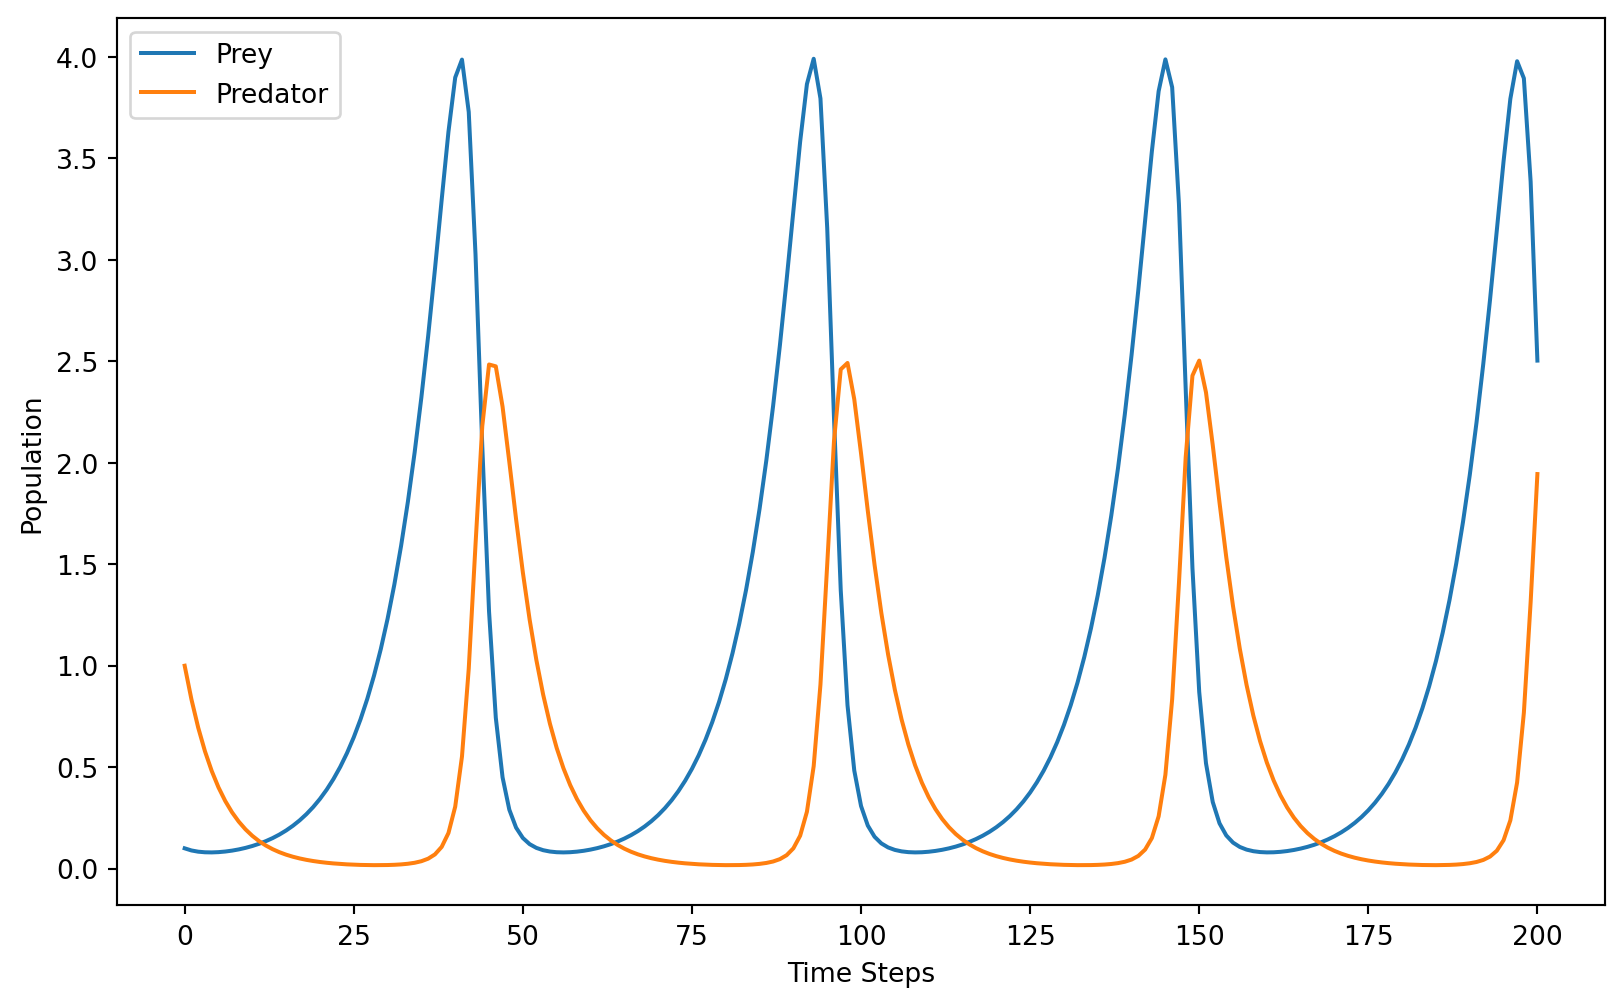

In [3]:
#| label: lotka-volterra
#| fig-cap: The Lotka-Volterra model implemented in PyTorch.
#| code-fold: true

import torch
import matplotlib.pyplot as plt

def runge_kutta_4(func, x0, params, time_horizon, time_steps):
    dt = time_horizon / time_steps
    X = [x0]
    for i in range(time_steps):
        x = X[-1]
        k1 = func(x, params[i])
        k2 = func(x + dt * k1 / 2, params[i])
        k3 = func(x + dt * k2 / 2, params[i])
        k4 = func(x + dt * k3, params[i])
        X_next = x + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        X.append(X_next)
    return torch.stack(X, dim=1)

def lv_func(x, params):
    alpha, beta, gamma, delta = params
    dxdt = torch.zeros(2)
    dxdt[0] = alpha * x[0] - beta * x[0] * x[1]  # Prey population change
    dxdt[1] = -gamma * x[1] + delta * x[0] * x[1] # Predator population change
    return dxdt

def lotka_volterra(params, x0, T=10, nt=1000):
    """
    Simulate the Lotka-Volterra model using the Runge-Kutta 4 method.

    Parameters:
    params (torch.Tensor): The parameters of the Lotka-Volterra model.
    x0 (torch.Tensor): The initial population of prey and predators.
    T (float): The time horizon of the simulation.
    nt (int): The number of time steps to simulate.

    Returns:
    torch.Tensor: The population of prey and predators at each time step.

    Notes:
    The parameters should be in the order alpha, beta, gamma, delta.
    They can either be fixed as [4,] or time-varying as [nt, 4].
    """

    # Check if params has shape [4,] and expand to [nt, 4] if needed
    if params.ndim == 1 and params.shape[0] == 4:
        # Repeat params along the time dimension to make it [nt, 4]
        params = params.unsqueeze(0).expand(nt, -1)
    elif params.shape != (nt, 4):
        raise ValueError("params must be either [4,] or [nt, 4]")
    
    # Proceed with the Runge-Kutta 4 integration
    return runge_kutta_4(lv_func, x0, params, T, nt)

period = 40.0  # Time horizon as a single float
n_time_steps = 200
params = torch.tensor([2/3, 4/3, 1.0, 1.0], requires_grad=True)
initial_pop = torch.tensor([0.1, 1.0])

solution = lotka_volterra(params, initial_pop, T=period, nt=n_time_steps)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution[0].detach(), label='Prey')
plt.plot(solution[1].detach(), label='Predator')
plt.xlabel('Time Steps')
plt.ylabel('Population')
plt.legend()
plt.show()

Computing realization 1/1


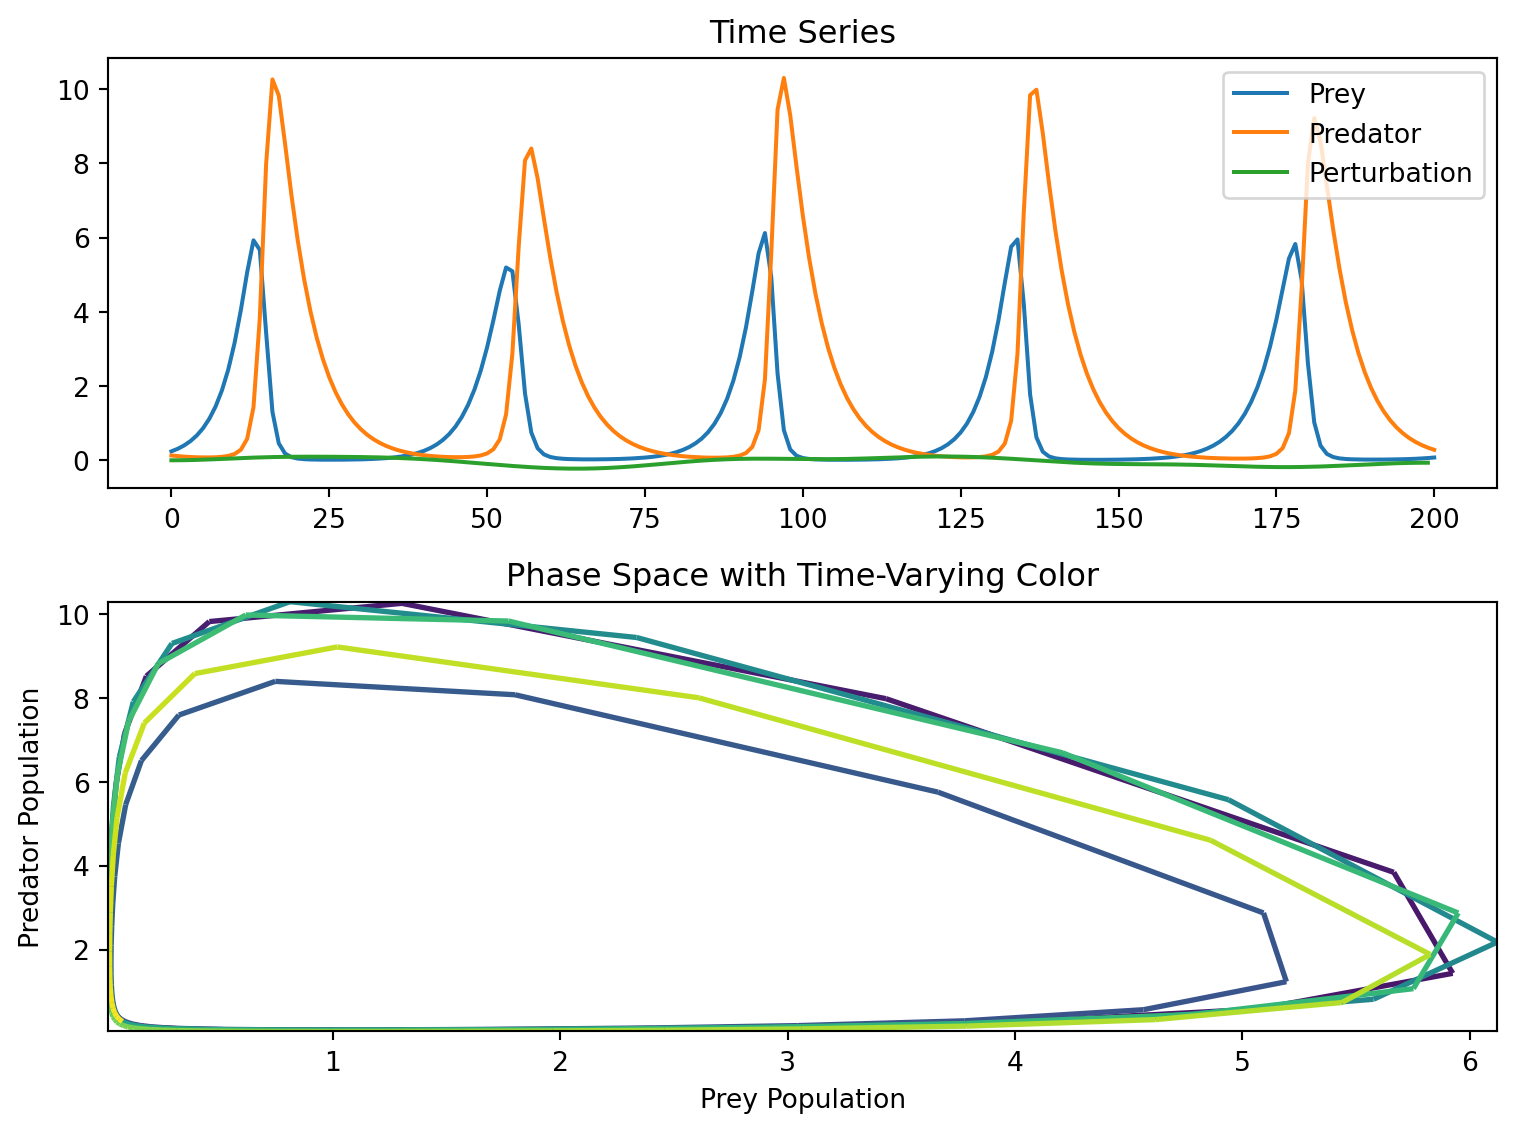

In [4]:
#| fig-cap: "Time variant Lotka-Volterra model with perturbations."
#| code-fold: true

import numpy as np
from matplotlib.collections import LineCollection
from torch.nn.functional import pad

def generate_data_set(initial_pop = initial_pop, period=40.0, n_time_steps=2000, n_realizations=10):
    pop_data_runs = []
    perturbations = []
    
    for run_idx in range(n_realizations):
        print(f'Computing realization {run_idx + 1}/{n_realizations}')
        
        # Generate noise for perturbing alpha across time steps
        noise = torch.randn(1, n_time_steps)  # Shape [1, n_time_steps] for a single parameter over time
        for _ in range(250):  # Smooth out the noise to resemble realistic fluctuations
            noise = pad(noise, pad=(1, 1), mode='reflect')
            noise = (noise[:, :-2] + 2 * noise[:, 1:-1] + noise[:, 2:]) / 4
        noise = noise.squeeze()  # Shape [n_time_steps]
        
        # Base parameters without perturbation, as shape [n_time_steps, 4]
        base_params = torch.tensor([4/3, 2/3, 1, 1]).expand(n_time_steps, 4)
        
        # Apply perturbation to alpha (the first parameter)
        params = base_params.clone()
        params[:, 0] += noise  # Modify alpha over time
                
        # Solve ODE with perturbed parameters
        pop_data = lotka_volterra(params, initial_pop, T=period, nt=n_time_steps)
        
        pop_data_runs.append(pop_data)
        perturbations.append(noise)
    
    return pop_data_runs, perturbations

initial_pop = torch.rand(2)
XX, M = generate_data_set(initial_pop=initial_pop, period=period, n_time_steps=n_time_steps, n_realizations=1)

X = XX[0]
pert = M[0]
d_true = X[0, :]  # Use the prey population as the data to fit

# Time series plot
plt.subplot(2,1,1)
plt.plot(X[0,:].detach(), label='Prey')
plt.plot(X[1,:].detach(), label='Predator')
plt.plot(pert.detach(), label='Perturbation')
plt.legend()
plt.title('Time Series')

# Phase space plot with color gradient
plt.subplot(2,1,2)

# Prepare data for LineCollection
prey = X[0,:].detach().numpy()
predator = X[1,:].detach().numpy()
points = np.array([prey, predator]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cmap = 'viridis'

# Create a LineCollection with the chosen colormap
lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 1))
lc.set_array(np.linspace(0, 1, len(segments)))  # Normalize color range to [0,1]
lc.set_linewidth(2)

# Add the LineCollection to the plot
plt.gca().add_collection(lc)

# Set plot limits to the data range
plt.xlim(prey.min(), prey.max())
plt.ylim(predator.min(), predator.max())

plt.title('Phase Space with Time-Varying Color')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')

plt.tight_layout()
plt.show()

In [5]:
#| label: jacobian-vector-product
#| fig-cap: Checking the jvp and vjp for the model.
from torch.autograd.functional import jvp, vjp

# fix all parts of the problem except the parameters
def forward_model(params):
    X = lotka_volterra(params, initial_pop, T=period, nt=n_time_steps)
    prey = X[0, :]
    return prey

# set an initial guess for the parameters
params = torch.tensor([2/3, 4/3, 1.0, 1.0], requires_grad=True)
v = torch.randn_like(params)

d,q = jvp(forward_model, params, v)

w = torch.randn_like(d)
d, a = vjp(forward_model, params, w)

# Check adjoint consistency
print(torch.sum(q*w), torch.sum(a*v))

tensor(137.0584) tensor(137.0584)


In [6]:
#| label: conjugate-gradient
#| fig-cap: Conjugate gradient descent for solving the normal equations.
#| code-fold: true

from functools import partial

def Hmv(forProb, p, sk):
  q = torch.autograd.functional.jvp(forProb, p, sk)[1]
  a = torch.autograd.functional.vjp(forProb, p, q)[1]
  return a

def conj_gradient(A, b, x0=None, niter=20, tol=1e-2, alpha=1e-2, verbose=True):
    """
    Solve Ax = b using the conjugate gradient method.
    
    Paramters:
        A (callable): A function that computes the matrix-vector product Ax.
        b (torch.Tensor): The right-hand side vector.
        x0 (torch.Tensor, optional): The initial guess. Defaults to None.
        niter (int, optional): Maximum number of iterations. Defaults to 20.
        tol (float, optional): Tolerance for the residual. Defaults to 1e-2.
        alpha (float, optional): Step size for the conjugate gradient method. Defaults to 1e-2. 
    """
    if x0 is None:
        r = b
    else:
        r = b - A(x0)

    q = r
    x = torch.zeros_like(b)
    for i in range(niter):
        Hq    = A(q)
        alpha = (r*r).sum()/(q*Hq).sum()
        x  = x + alpha*q
        rnew  = r - alpha*Hq
        beta = (rnew**2).sum()/(r**2).sum()
        q    = rnew + beta*q
        r    = rnew.clone()
        if verbose:
            print('iter = %3d    res = %3.2e'%(i, r.norm()/b.norm()))
        if r.norm()/b.norm() < tol:
            break
    return x

A = partial(Hmv, forward_model, params)
b = torch.autograd.functional.vjp(forward_model, params, d_true)[1]

x = conj_gradient(A, b, niter=20, tol=1e-2, alpha=1e-2)
print(x)

iter =   0    res = 8.70e-02


iter =   1    res = 5.42e-02


iter =   2    res = 9.93e-03
tensor([ 0.0513, -0.0344, -0.0873, -0.1522])


Computing realization 1/1


Iteration 1/200: Residual = 16.52724838256836


Iteration 2/200: Residual = 16.352787017822266


Iteration 3/200: Residual = 16.210529327392578


Iteration 4/200: Residual = 16.094886779785156


Iteration 5/200: Residual = 16.00113296508789


Iteration 6/200: Residual = 15.925278663635254


Iteration 7/200: Residual = 16.377958297729492


Iteration 8/200: Residual = 16.209428787231445


Iteration 9/200: Residual = 16.071134567260742


Iteration 10/200: Residual = 15.959471702575684


Iteration 11/200: Residual = 15.870966911315918


Iteration 12/200: Residual = 15.802122116088867


Iteration 13/200: Residual = 15.749506950378418


Iteration 14/200: Residual = 15.709897994995117


Iteration 15/200: Residual = 15.680413246154785


Iteration 16/200: Residual = 15.658599853515625


Iteration 17/200: Residual = 15.642484664916992


Iteration 18/200: Residual = 15.630532264709473


Iteration 19/200: Residual = 15.621593475341797


Iteration 20/200: Residual = 17.39739227294922


Iteration 21/200: Residual = 17.21563720703125


Iteration 22/200: Residual = 17.042539596557617


Iteration 23/200: Residual = 16.874387741088867


Iteration 24/200: Residual = 16.708812713623047


Iteration 25/200: Residual = 16.54524040222168


Iteration 26/200: Residual = 16.385360717773438


Iteration 27/200: Residual = 16.23322868347168


Iteration 28/200: Residual = 16.094684600830078


Iteration 29/200: Residual = 15.97584056854248


Iteration 30/200: Residual = 15.880813598632812


Iteration 31/200: Residual = 15.81002140045166


Iteration 32/200: Residual = 15.76007080078125


Iteration 33/200: Residual = 15.725567817687988


Iteration 34/200: Residual = 15.701814651489258


Iteration 35/200: Residual = 15.684798240661621


Iteration 36/200: Residual = 15.671846389770508


Iteration 37/200: Residual = 15.661354064941406


Iteration 38/200: Residual = 15.65239429473877


Iteration 39/200: Residual = 15.64445686340332


Iteration 40/200: Residual = 15.637263298034668


Iteration 41/200: Residual = 15.63064956665039


Iteration 42/200: Residual = 15.62452220916748


Iteration 43/200: Residual = 15.618821144104004


Iteration 44/200: Residual = 15.613505363464355


Iteration 45/200: Residual = 15.608546257019043


Iteration 46/200: Residual = 15.603919982910156


Iteration 47/200: Residual = 15.599605560302734


Iteration 48/200: Residual = 15.595584869384766


Iteration 49/200: Residual = 15.591841697692871


Iteration 50/200: Residual = 15.588357925415039


Iteration 51/200: Residual = 15.58511734008789


Iteration 52/200: Residual = 17.856220245361328


Iteration 53/200: Residual = 17.635679244995117


Iteration 54/200: Residual = 17.439889907836914


Iteration 55/200: Residual = 17.263700485229492


Iteration 56/200: Residual = 17.103151321411133


Iteration 57/200: Residual = 16.955930709838867


Iteration 58/200: Residual = 16.821884155273438


Iteration 59/200: Residual = 16.702970504760742


Iteration 60/200: Residual = 16.60219955444336


Iteration 61/200: Residual = 16.521533966064453


Iteration 62/200: Residual = 16.460895538330078


Iteration 63/200: Residual = 16.416685104370117


Iteration 64/200: Residual = 16.385019302368164


Iteration 65/200: Residual = 16.362361907958984


Iteration 66/200: Residual = 16.345972061157227


Iteration 67/200: Residual = 16.333900451660156


Iteration 68/200: Residual = 16.32482147216797


Iteration 69/200: Residual = 16.317852020263672


Iteration 70/200: Residual = 16.312395095825195


Iteration 71/200: Residual = 16.308040618896484


Iteration 72/200: Residual = 16.304515838623047


Iteration 73/200: Residual = 16.301620483398438


Iteration 74/200: Residual = 16.29922103881836


Iteration 75/200: Residual = 16.297204971313477


Iteration 76/200: Residual = 16.295499801635742


Iteration 77/200: Residual = 16.294048309326172


Iteration 78/200: Residual = 16.292804718017578


Iteration 79/200: Residual = 16.291732788085938


Iteration 80/200: Residual = 16.290803909301758


Iteration 81/200: Residual = 16.289995193481445


Iteration 82/200: Residual = 16.289291381835938


Iteration 83/200: Residual = 16.288673400878906


Iteration 84/200: Residual = 16.28813362121582


Iteration 85/200: Residual = 16.287656784057617


Iteration 86/200: Residual = 16.2872371673584


Iteration 87/200: Residual = 16.286867141723633


Iteration 88/200: Residual = 16.286535263061523


Iteration 89/200: Residual = 16.286245346069336


Iteration 90/200: Residual = 16.285985946655273


Iteration 91/200: Residual = 16.285755157470703


Iteration 92/200: Residual = 16.28554916381836


Iteration 93/200: Residual = 16.285364151000977


Iteration 94/200: Residual = 16.285202026367188


Iteration 95/200: Residual = 16.285057067871094


Iteration 96/200: Residual = 16.284923553466797


Iteration 97/200: Residual = 16.284807205200195


Iteration 98/200: Residual = 16.284700393676758


Iteration 99/200: Residual = inf


Iteration 100/200: Residual = nan


Iteration 101/200: Residual = nan


Iteration 102/200: Residual = nan


Iteration 103/200: Residual = nan


Iteration 104/200: Residual = nan


Iteration 105/200: Residual = nan


Iteration 106/200: Residual = nan


Iteration 107/200: Residual = nan


Iteration 108/200: Residual = nan


Iteration 109/200: Residual = nan


Iteration 110/200: Residual = nan


Iteration 111/200: Residual = nan


Iteration 112/200: Residual = nan


Iteration 113/200: Residual = nan


Iteration 114/200: Residual = nan


Iteration 115/200: Residual = nan


Iteration 116/200: Residual = nan


Iteration 117/200: Residual = nan


Iteration 118/200: Residual = nan


Iteration 119/200: Residual = nan


Iteration 120/200: Residual = nan


Iteration 121/200: Residual = nan


Iteration 122/200: Residual = nan


Iteration 123/200: Residual = nan


Iteration 124/200: Residual = nan


Iteration 125/200: Residual = nan


Iteration 126/200: Residual = nan


Iteration 127/200: Residual = nan


Iteration 128/200: Residual = nan


Iteration 129/200: Residual = nan


Iteration 130/200: Residual = nan


Iteration 131/200: Residual = nan


Iteration 132/200: Residual = nan


Iteration 133/200: Residual = nan


Iteration 134/200: Residual = nan


Iteration 135/200: Residual = nan


Iteration 136/200: Residual = nan


Iteration 137/200: Residual = nan


Iteration 138/200: Residual = nan


Iteration 139/200: Residual = nan


Iteration 140/200: Residual = nan


Iteration 141/200: Residual = nan


Iteration 142/200: Residual = nan


Iteration 143/200: Residual = nan


Iteration 144/200: Residual = nan


Iteration 145/200: Residual = nan


Iteration 146/200: Residual = nan


Iteration 147/200: Residual = nan


Iteration 148/200: Residual = nan


Iteration 149/200: Residual = nan


Iteration 150/200: Residual = nan


Iteration 151/200: Residual = nan


Iteration 152/200: Residual = nan


Iteration 153/200: Residual = nan


Iteration 154/200: Residual = nan


Iteration 155/200: Residual = nan


Iteration 156/200: Residual = nan


Iteration 157/200: Residual = nan


Iteration 158/200: Residual = nan


Iteration 159/200: Residual = nan


Iteration 160/200: Residual = nan


Iteration 161/200: Residual = nan


Iteration 162/200: Residual = nan


Iteration 163/200: Residual = nan


Iteration 164/200: Residual = nan


Iteration 165/200: Residual = nan


Iteration 166/200: Residual = nan


Iteration 167/200: Residual = nan


Iteration 168/200: Residual = nan


Iteration 169/200: Residual = nan


Iteration 170/200: Residual = nan


Iteration 171/200: Residual = nan


Iteration 172/200: Residual = nan


Iteration 173/200: Residual = nan


Iteration 174/200: Residual = nan


Iteration 175/200: Residual = nan


Iteration 176/200: Residual = nan


Iteration 177/200: Residual = nan


Iteration 178/200: Residual = nan


Iteration 179/200: Residual = nan


Iteration 180/200: Residual = nan


Iteration 181/200: Residual = nan


Iteration 182/200: Residual = nan


Iteration 183/200: Residual = nan


Iteration 184/200: Residual = nan


Iteration 185/200: Residual = nan


Iteration 186/200: Residual = nan


Iteration 187/200: Residual = nan


Iteration 188/200: Residual = nan


Iteration 189/200: Residual = nan


Iteration 190/200: Residual = nan


Iteration 191/200: Residual = nan


Iteration 192/200: Residual = nan


Iteration 193/200: Residual = nan


Iteration 194/200: Residual = nan


Iteration 195/200: Residual = nan


Iteration 196/200: Residual = nan


Iteration 197/200: Residual = nan


Iteration 198/200: Residual = nan


Iteration 199/200: Residual = nan


Iteration 200/200: Residual = nan
Optimal parameters: tensor([nan, nan, nan, nan], grad_fn=<AddBackward0>)


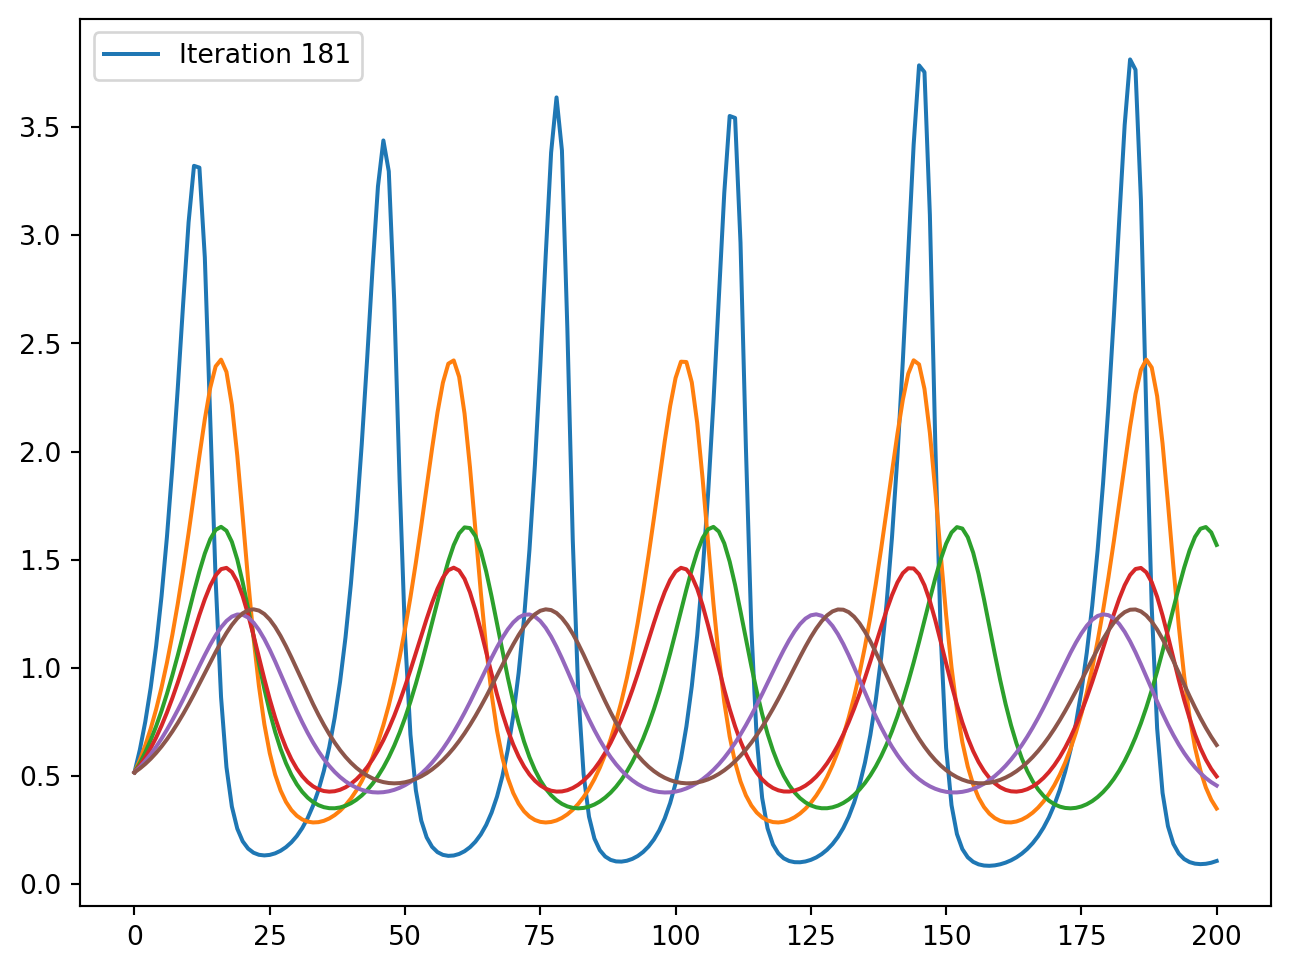

In [7]:
#| label: gauss-newton
#| fig-cap: The Gauss-Newton optimization method for the Lotka-Volterra model.

period = 40.0  # Time horizon as a single float
n_time_steps = 200
initial_pop = torch.rand(2)

# Making a true data set to fit to
XX, M = generate_data_set(initial_pop=initial_pop, period=period, n_time_steps=n_time_steps, n_realizations=1)
X = XX[0]
d_true = X[0, :]  # Use the prey population as the data to fit

# Ptrue = torch.tensor([4/3, 2/3, 1.0, 1.0], requires_grad=True)
# Start with an initial guess for the parameters
p0 = torch.tensor([.9, 1.2, .7, .7], requires_grad=True)

# fix all parts of the problem except the parameters
def forward_model(params):
    X = lotka_volterra(params, initial_pop, T=period, nt=n_time_steps)
    prey = X[0, :]
    return prey


def gauss_newton_solver(forward_model, p0, data, max_iter=100, tol=1e-6, mu=1, verbose=True):
    """
    Solve a non-linear least squares problem using the Gauss-Newton method.

    Parameters:
        forward_model (callable): A function that computes the forward model.
        p0 (torch.Tensor): The initial guess for the parameters.
        data (torch.Tensor): The observed data to fit to.
        max_iter (int): Maximum number of iterations. Defaults to 100.
        tol (float): Tolerance for the residual. Defaults to 1e-6.
        mu (float): Step size for the Gauss-Newton method. Defaults to 1.
        verbose (bool): Whether to print iteration information. Defaults to True.
    """

    plt.plot(data.cpu().detach())
    
    params = p0
    for i in range(max_iter):
        # Compute residual
        data_pred = forward_model(params)
        rk = data - data_pred
               
        # Compute the parts of the conjugate gradient
        b = torch.autograd.functional.vjp(forward_model, params, rk)[1]
        def A(sk):
            q = torch.autograd.functional.jvp(forward_model, params, sk)[1]
            a = torch.autograd.functional.vjp(forward_model, params, q)[1]
            return a
        s_k = conj_gradient(A, b, niter=20, tol=1e-2, alpha=1e-2, verbose=False)
        
        # Update the parameters
        params = params + mu * s_k
        
        # Check for convergence
        if s_k.norm() < tol:
            print(f'Converged in {i+1} iterations')
            break
        if verbose:
            print(f'Iteration {i+1}/{max_iter}: Residual = {rk.norm().item()}')
        
        if i % 20 == 0:
            plt.plot(data_pred.cpu().detach())
            plt.legend([f'Iteration {i+1}']) 
    return params

# Solve the problem
p_opt = gauss_newton_solver(forward_model, p0, d_true, max_iter=200, tol=1e-6, mu=1e-1)
print(f"Optimal parameters: {p_opt}")

plt.show()